In [ ]:
zip_path = '/content/drive/My\ Drive/Datasets/santa-dataset.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/santa-dataset.zip -d /content

# !rm /content/santa-dataset.zip

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers import LeakyReLU
from numpy.random import seed

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [ ]:
# seed(10)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Ftrl(learning_rate=0.001, learning_rate_power=0)
# opt = SGD(lr=0.001, momentum=0.9)
# opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 80000)            

In [ ]:
dataset_dir = '/content/santa-dataset'
# seed(10)

train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_aug_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=60, target_size=(200, 200))
test_aug_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=60, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
# seed(10)
history_base_model = model.fit_generator(train_aug_iterator, steps_per_epoch=len(train_aug_iterator), validation_data=test_aug_iterator, validation_steps=len(test_aug_iterator), epochs=75)

Epoch 1/75
12/12 [==============================] - 18s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/75
12/12 [==============================] - 18s 1s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/75
12/12 [==============================] - 18s 1s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/75
12/12 [==============================] - 18s 1s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/75
12/12 [==============================] - 18s 1s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/75
12/12 [==============================] - 18s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/75
12/12 [==============================] - 17s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/75
12/12 [==

In [ ]:
history_df = pd.DataFrame(history_base_model.history)
history_df['epoch'] = history_base_model.epoch
history_df

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.693151,0.5,0.693148,0.5,0
1,0.693147,0.5,0.693148,0.5,1
2,0.693149,0.5,0.693148,0.5,2
3,0.693150,0.5,0.693148,0.5,3
4,0.693150,0.5,0.693148,0.5,4
...,...,...,...,...,...
70,0.693150,0.5,0.693149,0.5,70
71,0.693154,0.5,0.693149,0.5,71
72,0.693148,0.5,0.693149,0.5,72
73,0.693148,0.5,0.693148,0.5,73


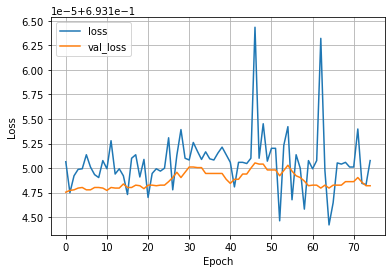

In [ ]:
plot_loss(history_base_model)

Hasil Terbaik model ini masih belum berhasil dikarenakan model ini masih terdapat error yang menyebabkan model ini tidak belajar sama sekali